In [1]:
!pip install graphviz

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#iris data loading 및 학습 data와 테스트 data로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,feature_names=iris_data.feature_names, impurity=True, filled=True)


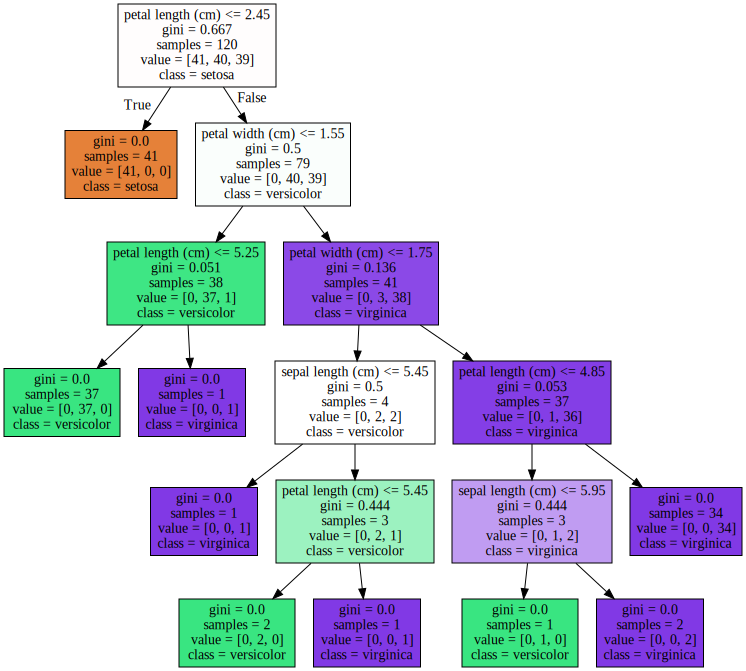

In [3]:
import graphviz

#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

feature importance : f[0.025 0.    0.555 0.42 ]
sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<AxesSubplot:>

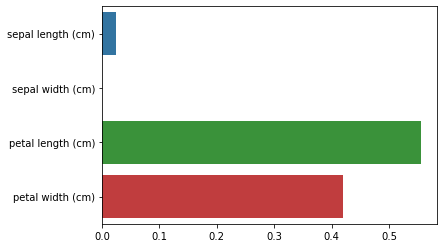

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print(f'feature importance : f{np.round(dt_clf.feature_importances_,3)}')

#feature별 importance mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, value)
    
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

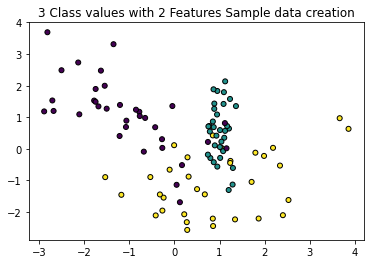

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 feature는 2개, class는 3가지 유형의 분류 sample data 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3,n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 feature로 2차원 좌표 시각화, 각 class값은 서로 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o', c=y_labels, s=25, edgecolor='k')

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

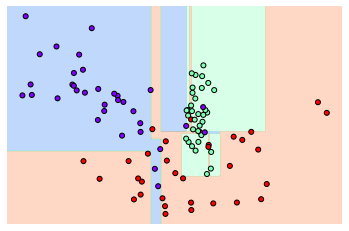

In [11]:
from sklearn.tree import DecisionTreeClassifier

#특정한 tree 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

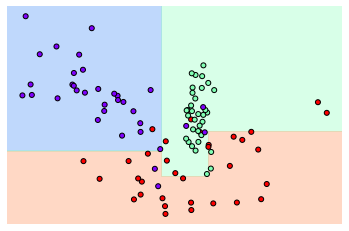

In [12]:
##min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 feature nae index와 feature name이 공백으로 분리되어 있음, 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',header=None, names=['column_index','column_name'])

#feature name index를 제거하고, feature name만 list 객체로 생성한뒤 sample로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [17]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [18]:
import pandas as pd

def get_human_dataset():
    
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
    
    # 중복된 feature 명을 수정하는 get_new_feature_name_df()를 이용, 신규 feature name에 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 feature name을 column으로 부여하기 위해 list object로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 feature dataset과 test feature data를 DataFrame으로 loading, column name은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    X_test = pd.read_csv('./data/human_Activity/test/X_test.txt',sep='\s+', names = feature_name)
    
    #학습 label과 test label를 DataFrame으로 loading하고 column name은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None, names = ['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+', header = None , names = ['action'])
    
    #load된 학습/test 용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [19]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [20]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)

print(dt_clf.get_params())

0.8547675602307431
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [27]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


0.8513444970102249


AttributeError: 'GridSearchCV' object has no attribute 'gest_params_'

In [28]:
params={'max_depth':[8,12,16,20],'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.gest_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished


0.8548794147162603


AttributeError: 'GridSearchCV' object has no attribute 'gest_params_'

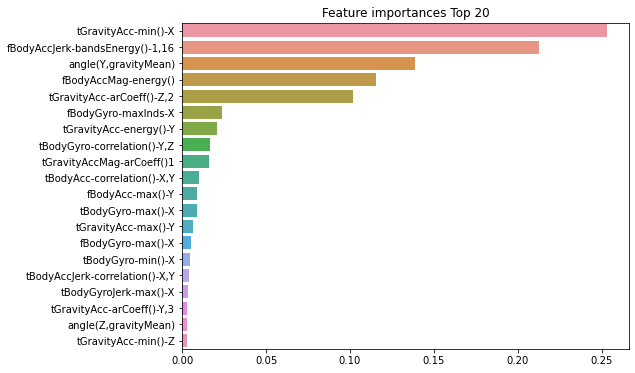

In [29]:
import seaborn as sns

best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게하고, seaborn의 막대그래프로 쉽게 표현하기 위해 series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
#중요도 값 순으로 series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [30]:
### ensemble learning